In [1]:
!pip install colormap
!pip install easydev

  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15637 sha256=9c23239edba5b1604f58ccfd2662b501edd7035e0ccc7fb6f88fb82ec1ce0f62
  Stored in directory: /root/.cache/pip/wheels/71/35/4b/259c328e39ede29b184e4ffe4443bcc2be4e475178a83794c3
Successfully built colormap
     |████████████████████████████████| 47 kB 2.3 MB/s 
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=f03f8e21b700aee209e73b6d63d09c8481082631f06f0ef9d2fa839465bcb48b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built easydev


In [2]:
import math
import random
import numpy as np
import graphviz
import cv2
from colormap import rgb2hex
from google.colab.patches import cv2_imshow

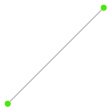

In [3]:
colour = rgb2hex(random.randint(0,255),random.randint(0,255),random.randint(0,255))


g = graphviz.Graph(format='png',engine='neato')

g.node('1',shape='point',color=colour,pos="0,0!")
g.node('2',shape='point',color=colour,pos="1,1!")
g.edge('1','2',color='gray')

g.render(filename='graph',view=True)
img = cv2.imread('graph.png')
cv2_imshow(img)

In [ ]:
g.format = 'svg'
g.render()

'graph.svg'

In [ ]:
help(Node)

Help on class Node in module __main__:

class Node(builtins.object)
 |  Node(id)
 |  
 |  Clase Nodo: Referente a los nodos.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [4]:
class Node:
        """
        Clase Nodo: Referente a los nodos. 
        """
        def __init__(self,id):

                self.id = id
                self.x = 0
                self.y = 0
                self.degree = 0
                self.neighboors = set()

In [5]:
class Edge:
        """
        Clase Edge: Referente a las aristas.
        """

        def __init__(self,source,target,id):

                self.n0 = source
                self.n1 = target
                self.id = id
                self.distance = 1

In [6]:
class Graph:
        """
        Clase grafo: Referente al grafo
        """
        def __init__(self,digraph=False,eng = 'fdp'):

                """
                Inicializa un grafo vacío.
                """

                self.id = 'graph'
                self.nodes = dict()
                self.edges = dict()
                self.digraph = digraph
                if digraph:
                        self.display = graphviz.Digraph(format='png',engine=eng)
                else:
                        self.display = graphviz.Graph(format='png',engine = eng)

        def addNode(self, name,pos='0'):
                """
                Agrega un nodo al grafo con el id name.
                pos: posición del nodo
                """
                if name not in self.nodes.keys():
                        node = Node(name)
                        colour = rgb2hex(random.randint(0,255),random.randint(0,255),random.randint(0,255))
                        self.nodes[name] = node
                        if pos == '0':
                                self.display.node(name,shape='point',color=colour)
                        else:
                                self.display.node(name,shape='point',color=colour,pos=pos)
                #return self.getNode(name)

        def addEdge(self, name, node0, node1):
                """
                Agrega una arista con nodos node0 y node1 como ids. 
                Crea los nodos si no existen.
                """
                if name not in self.edges.keys():
                        self.addNode(node0)
                        self.addNode(node1)
                        n0 = self.getNode(node0)
                        n1 = self.getNode(node1)
                        e = Edge(n0,n1,name)
                        self.edges[name] = e
                        self.display.edge(node0,node1,color='gray')
                        n0.degree += 1
                        n1.degree += 1
                        n0.neighboors.add(node1)
                        n1.neighboors.add(node0)
                #return e

        def getNode(self,name):
                """
                Invoca al nodo con el id name.
                """
                return self.nodes.get(name)

        def getEdge(self,name):
                """
                Invoca a la arista con el id name.
                """
                return self.edges.get(name)

        def show(self):
                """
                Guarda al nodo en el archivo graph.gv para leer en Gephi.
                Guarda una imagen del nodo con el archivo graph.png
                Muestra la imagen.
                """
                self.display.render(filename='graph.gv',view=True)
                img = cv2.imread('graph.gv.png')
                cv2_imshow(img) # MODIFICAR 

In [ ]:
g = Graph()

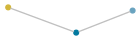

In [ ]:
g.addNode('3')
#g.addNode('2')
g.addNode('1')
g.addEdge('12','1','2')
g.addEdge('31','3','1')
g.show()

In [ ]:
print(g.id)
D = g.getNode('1').neighboors 
for d in D:
  print(d)

graph
2
3


# Modelo $G_{n,m}$ de Erdös-Rényi

Crear $n$ vértices y elegir uniformement al azar $m$ distintos pares de distintos vértices.

In [7]:
def randomErdosRenyi(n,m, directed=False, selfloop=False):
        """
        Generación de grafos aleatorios con el modelo de Erdös-Rényi
        Crear n vértices y elegir uniformement al azar m distintos pares de distintos vértices.
        n: número de nodos
        m: número de aristas
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        return: genera grafo aleatorio
        """

        g = Graph(digraph=directed)

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0
        if m > n*n:
                print("m>n*n: maximum number of edges reached")
                print("Setting m = n*n")
                m = n*n

        for i in range(n):
                g.addNode(str(i))

        added = []

        for i in range(m):
                keepg = True
                while keepg: 
                        keepg = False
                        if directed and selfloop:
                                u = random.randint(0,n-1)
                                v = random.randint(0,n-1)    
                                nameEdge = str(u) + '->' + str(v)
                                if nameEdge not in added:
                                        added.append(nameEdge)
                                        g.addEdge(nameEdge,str(u),str(v))
                                else:
                                        keepg = True 

                        elif not directed and selfloop:
                                u = random.randint(0,n-1)
                                v = random.randint(0,n-1)    
                                nameEdge = str(u) + '->' + str(v)
                                nameEdgeA= str(v) + '->' + str(u)
                                if nameEdge not in added:
                                        added.append(nameEdge)
                                        added.append(nameEdgeA)
                                        g.addEdge(nameEdge,str(u),str(v))
                                else:
                                        keepg = True

                        elif directed and not selfloop:
                                u = random.randint(0,n-1)
                                v = random.randint(0,n-1)    
                                nameEdge = str(u) + '->' + str(v)
                                if nameEdge not in added and u != v:
                                        added.append(nameEdge)
                                        g.addEdge(nameEdge,str(u),str(v))
                                else:
                                        keepg = True

                        elif not directed and not selfloop:
                                u = random.randint(0,n-1)
                                v = random.randint(0,n-1)    
                                nameEdge = str(u) + '->' + str(v)
                                nameEdgeA= str(v) + '->' + str(u)
                                if nameEdge not in added and u != v:
                                        added.append(nameEdge)
                                        added.append(nameEdgeA)
                                        g.addEdge(nameEdge,str(u),str(v))
                                else:
                                        keepg = True
        return g   

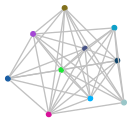

In [ ]:
g = randomErdosRenyi(10,40)

g.show()

# Modelo $G_{n,p}$ de Gilbert

Crear $n$ vértices y poner una arista entre cada par independiente y uniforme con probabilidad $p$

In [ ]:
def randomGilbert(n,p,directed=False, selfloop=False):
        """
        Generación aleatorio de grafos utilizando el modelo de Gilbert
        Crear n vértices y poner una arista entre cada par independiente y uniforme con probabilidad p
        n: número de nodos
        p: probabilidad 
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        return: grafo aleatorio generado
        """
        g = Graph(digraph=directed)

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0

        if p <= 0:
                print("p <= 0: not valid")
                print("Setting p = 0")
                p = 0
        elif p > 1:
                print("p > 1: not valid")
                print("Setting p = 1")
                p = 1

        for i in range(n):
                g.addNode(str(i))

        for i in range(n):
                for j in range(n):
                        if random.random() < p:
                                if directed and selfloop:
                                        g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                
                                elif directed and not selfloop:
                                        if (j != i):
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))

                                elif not directed and selfloop:
                                        if i <= j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                
                                elif not directed and not selfloop:
                                        if i < j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                

        return g

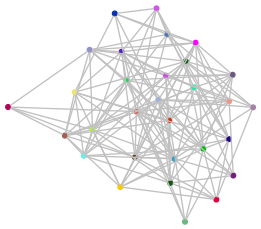

In [ ]:
g = randomGilbert(30,0.3)
g.show()

# Modelo $G_{n,r}$ geográfico simple

Colocar $n$ vértices en un rectángulo unitario con coordenadas uniformes (o normales) y colocar una arista entre cada par que queda en distancia $r$ o menor.

In [ ]:
def dist(a,b,x,y):
        return math.sqrt((x-a)**2 + (y-b)**2)

def randomGeographic(n,r,directed=False, selfloop=False):
        """
        Generación automática grafos utilizando el modelo geográfico simple.
        Colocar n vértices en un rectángulo unitario con coordenadas uniformes (o normales) 
        y colocar una arista entre cada par que queda en distancia r o menor.
        n: número de nodos.
        r: distancia máxima para generar el nodo.
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        return: grafo aleatorio generado
        """

        g = Graph(digraph=directed,eng='neato')

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0

        if r < 0:
                print("r < 0: not valid")
                print("Setting p = 0")
                r = 0

        for i in range(n):
                x = 4*random.random()
                y = 4*random.random()
                g.addNode(str(i),pos=str(x) + ','+ str(y)+'!')
                g.getNode(str(i)).x = x
                g.getNode(str(i)).y = y

        for i in range(n):
                a = g.getNode(str(i)).x
                b = g.getNode(str(i)).y

                for j in range(n):
                        c = g.getNode(str(j)).x
                        d = g.getNode(str(j)).y

                        rho = dist(a,b,c,d)
                        #print(a,b,c,d,rho)

                        if rho < r:
                                if directed and selfloop:
                                        g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                        g.getEdge(str(i) + '->' + str(j)).distance = rho
                                
                                elif directed and not selfloop:
                                        if (j != i):
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                                g.getEdge(str(i) + '->' + str(j)).distance = rho
                                elif not directed and selfloop:
                                        if i <= j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                                g.getEdge(str(i) + '->' + str(j)).distance = rho

                                elif not directed and not selfloop:
                                        if i < j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                                g.getEdge(str(i) + '->' + str(j)).distance = rho

        return g

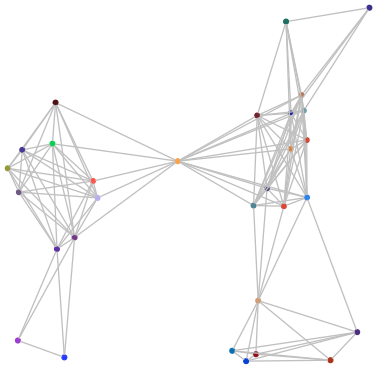

In [ ]:
g = randomGeographic(30,1.5)
g.show()

# Variante del modelo $G_{n,d}$ Barabási-Albert

Colocar $n$ vértices uno por uno, asignando a cada uno $d$ aristas o vértices distintos de tal manera que la probabilidad de que el vértice nuevo se conecte a un vértice existente $v$ es proporcional a la cantidad de aristas que $v$ tiene actualmente – los primeros $d$ vértices se conectan todos con todos.

In [ ]:
def randomBarabasiAlbert(n,d,directed=False, selfloop=False):
        """
        Generación aleatoria de grafos utilizando el modelo de Barabasi-Albert
        Colocar n vértices uno por uno, asignando a cada uno d aristas o vértices 
        distintos de tal manera que la probabilidad de que el vértice nuevo se conecte 
        a un vértice existente v es proporcional a la cantidad de aristas que v
        tiene actualmente – los primeros d vértices se conectan todos con todos.
        n: número de nodos
        d: nuevos nodos
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        return: grafo aleatorio generado
        """
        g = Graph(digraph=directed)

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0

        if d < 0:
                print("d < 0: not valid")
                print("Setting d = 0")
                d = 0


        #g.addNode(str(0))

        for i in range(n):
                g.addNode(str(i))

        #g.addEdge(str(0) + '->' + str(1),str(0),str(1))

        for u in range(1,n):
                randomNodes = np.arange(u)
                np.random.shuffle(randomNodes)

                for v in range(u):
                        j = randomNodes[v]
                        deg = g.getNode(str(j)).degree
                        p = 1 - deg / d
                        

                        if random.random() < p:
                                i = u*1
                                #print(p)

                                if directed and selfloop:
                                        g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                
                                elif directed and not selfloop:
                                        if (j != i):
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))

                                elif not directed and selfloop:
                                        if i >= j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                
                                elif not directed and not selfloop:
                                        if i > j:
                                                g.addEdge(str(i) + '->' + str(j),str(i),str(j))
                                

        return g

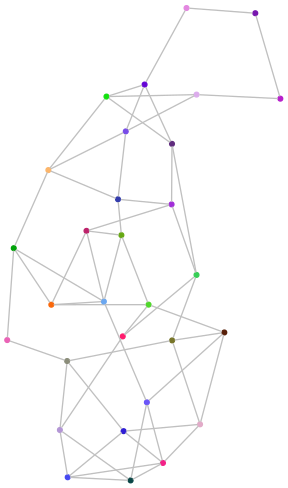

In [ ]:
g = randomBarabasiAlbert(30,4)
g.show()

# Modelo $G_{m,n}$ de malla

Crear $m\times n$ nodos. Para el nodo $n_{i,j}$ crear una arista con el nodo $n_{i+1,j}$ y otra con el nodo $n_{i,j+1}$, para $i<m$ y $j<n$.

In [ ]:
def grid(m,n, directed=False,diagonals=False):
        """
        Generación de grafos utilizando el modelo de malla.
        Crear  𝑚×𝑛  nodos. Para el nodo  𝑛𝑖,𝑗  crear una arista con 
        el nodo  𝑛𝑖+1,𝑗  y otra con el nodo  𝑛𝑖,𝑗+1 , para  𝑖<𝑚  y  𝑗<𝑛 .
        n: número de columnas
        m: número de filas
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        return: grafo aleatorio generado
        """

        if n == 0:
                n = m

        m = max(2,m)
        n = max(2,n)

        g = Graph(digraph=directed,eng='neato')

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0
        #if m > n*n:
        #        print("m>n*n: maximum number of edges reached")
        #        print("Setting m = n*n")
        #        m = n*n

        #for i in range(n):
        #        g.addNode(str(i))

        # First, we add all nodes

        for i in range(m):
                for j in range(n):
                        g.addNode(str(i*n+j),pos=str(i) + ','+ str(j)+'!')


        for i in range(m):
                for j in range(n):
                        
                        #g.addNode(str(i*n+j),pos=str(i) + ','+ str(j)+'!')
                        #g.addNode(str(i*n+j)).x = float(i)
                        #g.addNode(str(i*n+j)).y = float(j)

                        if j < n-1:
                                a = i*n + j
                                b = i*n + j + 1
                                g.addEdge(str(a)+'->' + str(b),str(a),str(b))

                        if i < m - 1:
                                a = i*n + j
                                b = (i+1)*n + j
                                g.addEdge(str(a)+'->' + str(b),str(a),str(b))

                        if i < m - 1 and j < n - 1 and diagonals:
                                a = i*n + j
                                b = (i+1)* n + j + 1
                                g.addEdge(str(a)+'->' + str(b),str(a),str(b))       

                        if i > 0 and j < n - 1 and diagonals:
                                a = i*n + j
                                b = (i-1)* n + j + 1
                                g.addEdge(str(a)+'->' + str(b),str(a),str(b)) 

        return g 

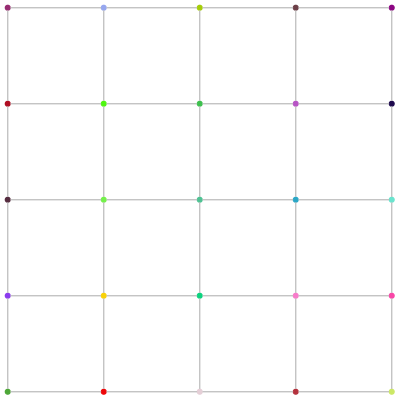

In [ ]:
g = grid(5,5)
g.show()

# Modelo $G_n$ de Dorogovtsev-Mendes

Crear 3 nodos y 3 aristas formando un triángulo. Después, para cada nodo adicional, se selecciona una arista al azar y se crean aristas entre el nodo nuevo y los extremos de la arista seleccionada.

In [ ]:
def dorogovtsevMendes(n, directed=False,diagonals=False):
        """
        Generación de grafos utilizando el modelo de Dorogovtsev-Mendes.
        Crear 3 nodos y 3 aristas formando un triángulo. Después, para cada nodo 
        adicional, se selecciona una arista al azar y se crean aristas entre el 
        nodo nuevo y los extremos de la arista seleccionada.
        n: número de nodos.
        directed: grafo dirigido
        selfloop: permitir auto-ciclos
        diagonals: permitir diagonales 
        return: grafo aleatorio generado       
        """

        g = Graph(digraph=directed,eng='sfdp')

        if n < 0:
                print("n < 0: not valid")
                print("Setting n = 0")
                n = 0


        # First, we add all nodes

        for i in range(n):
                g.addNode(str(i))


        if n >= 2:
                g.addEdge(str(0) + '->' + str(1),str(0),str(1))

        if n >= 3:
                g.addEdge(str(1) + '->' + str(2),str(1),str(2))
                g.addEdge(str(0) + '->' + str(2),str(0),str(2))       



        for i in range(2,n-1):
                E = list(g.edges.keys()) #list(np.arange(0,i))
                a = random.choice(E)
                nd0 = g.getEdge(a).n0.id
                nd1 = g.getEdge(a).n1.id
                #print(a,nd0,nd1)
                g.addEdge(str(i+1) + '->' + nd0,str(i+1),nd0)  
                g.addEdge(str(i+1) + '->' + nd1,str(i+1),nd1)


        return g 

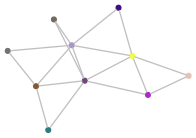

In [ ]:
g = dorogovtsevMendes(10)

g.show()

In [ ]:
p = list(g.edges.keys())[3]
n1 = g.getEdge(p).n1
print(n1.id)

0


In [ ]:
A = [1,2,3]
A.remove(1)
print(A)

[2, 3]


# DFS_R

In [8]:
def DFSaux(G,u,explorados,g):
        """
        DFS
        G: grafo
        u: id del grafo inicial
        explorados: nodos explorados
        g: grafo de salida
        """
        explorados.append(u)
        #g = Graph()
        g.addNode(u)
        D = G.getNode(u).neighboors 
        #print(D)
        for v in D:
                if v not in explorados:
                        g.addEdge(u + '->' + v,u,v)
                        g = DFSaux(G,v,explorados,g)
        #print(explorados)
        return g

def DFS_R(G,u):
        explorados = []
        g = Graph() 
        g = DFSaux(G,u,explorados,g)
        return g
     

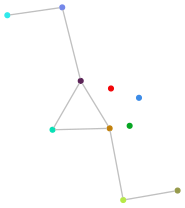

In [ ]:
g1 = randomErdosRenyi(10,7)

g1.show()

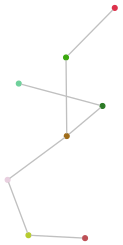

In [ ]:
g2 = DFS_R(g1,'1')
g2.show()

# DFS_I

In [ ]:
def DFS_Iaux(G,inicial,g,stack,visited):
        stack.append(inicial)
        while len(stack) != 0:
                u = stack[-1]
                stack.pop()
                visited.append(u)
                g.addNode(u)
                D = G.getNode(u).neighboors
                #print(D)
                for v in D:
                        if v not in visited:
                                g.addEdge(u + '->' + v,u,v)
                                g = DFS_Iaux(G,v,g,stack,visited)

        return g

def DFS_I(G,u):
        stack = []
        visited = []
        g = Graph()
        g = DFS_Iaux(G,u,g,stack,visited) 
        return g                               

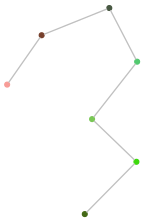

In [ ]:
g2 = DFS_I(g1,'2')
g2.show()

# BFS

In [ ]:
def BFS(G,u):
        L = []
        discovered = dict()
        discovered[u] = True
        nodos = list(G.nodes.keys())
        for n in nodos:
                if u != n:
                        discovered[n] = False
        
        g = Graph()
        g.addNode(u)
        L0 = [u]
        g.addNode(u)
        L.append(L0)
        Li = L0*1
        while len(Li) != 0:
                Lii = []
                for u in Li:
                        D = G.getNode(u).neighboors 
                        for v in D:
                                if discovered[v] == False:
                                        discovered[v] = True
                                        g.addNode(v)
                                        g.addEdge(u + '->' + v,u,v)
                                        Lii.append(v)
                L.append(Lii)
                Li = Lii*1

        return g               

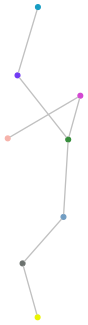

In [ ]:
g2 = BFS(g1,'1')
g2.show()

In [1]:
import graphviz

h = graphviz.Graph('hello', format='svg')
h.edge('Hello', 'World')